In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")

# --- Setup Save Directory ---
# Define the directory to save figures
output_dir = '../reports/figures'
os.makedirs(output_dir, exist_ok=True)
print(f"Plots will be saved to: {output_dir}")




Plots will be saved to: ../reports/figures


In [2]:
# --- 1. Load and Clean Data ---
print("\n--- Loading Credit Card Data ---")
credit_df = pd.read_csv('../data/01_raw/creditcard.csv')

# Check for duplicates
print(f"Number of duplicate rows: {credit_df.duplicated().sum()}")
credit_df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {credit_df.shape}")





--- Loading Credit Card Data ---
Number of duplicate rows: 1081
Shape after dropping duplicates: (283726, 31)



--- Credit Card Class Distribution ---
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64
Saved plot: creditcard_class_distribution.png


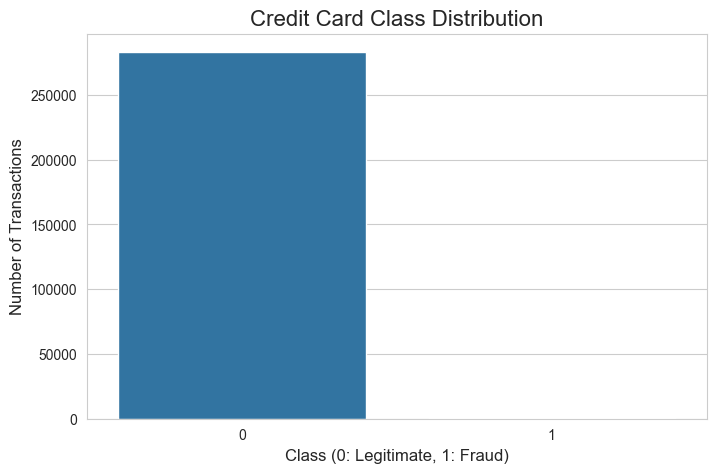

Saved plot: creditcard_amount_by_class.png


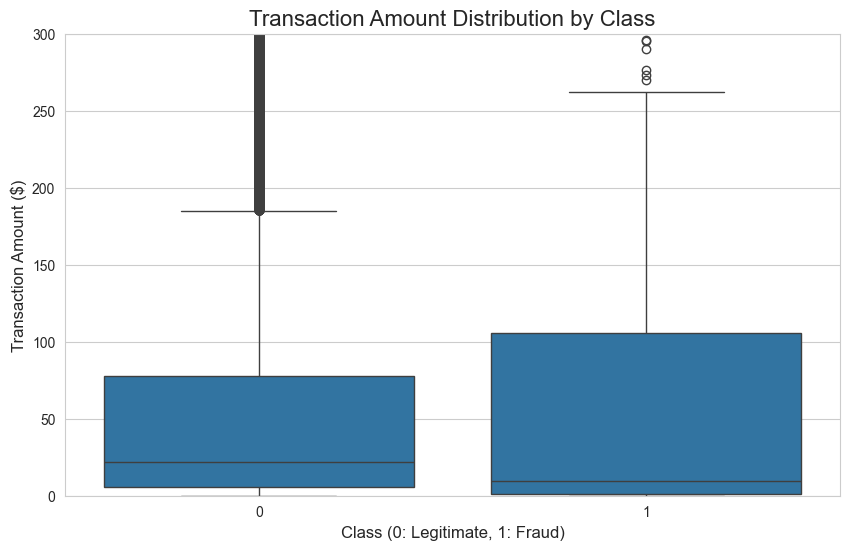


--- Visualizing Distributions of Key 'V' Features ---
Saved plot: creditcard_V10_distribution.png


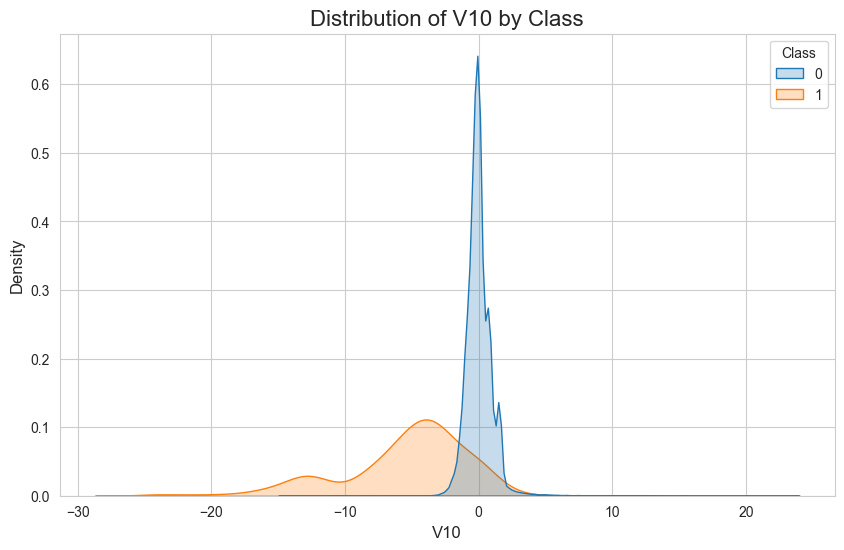

Saved plot: creditcard_V12_distribution.png


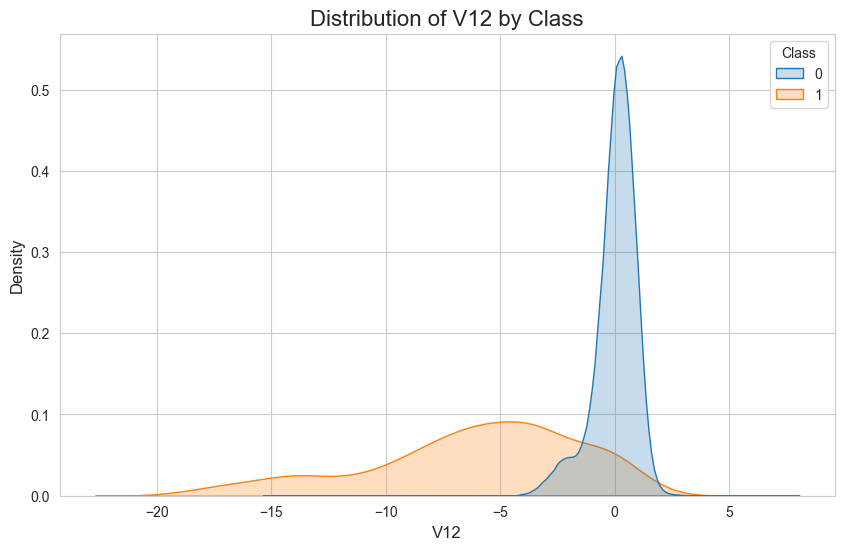

Saved plot: creditcard_V14_distribution.png


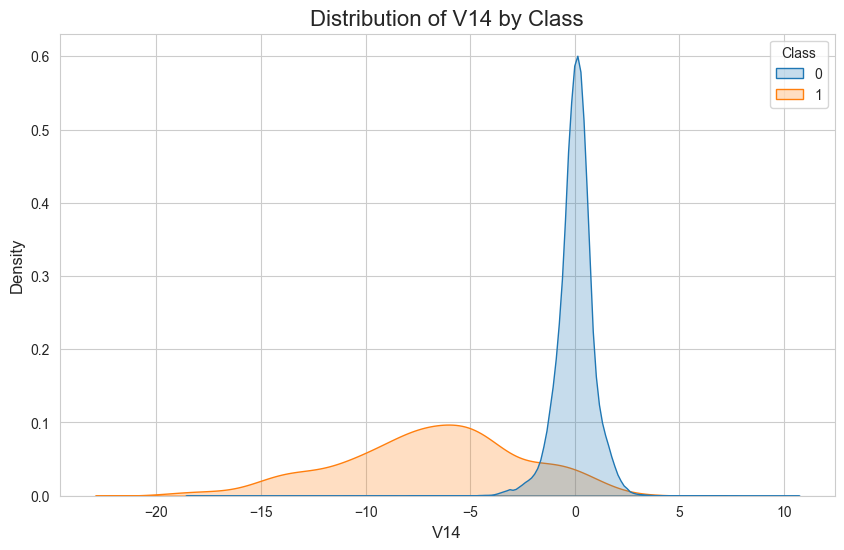

Saved plot: creditcard_V17_distribution.png


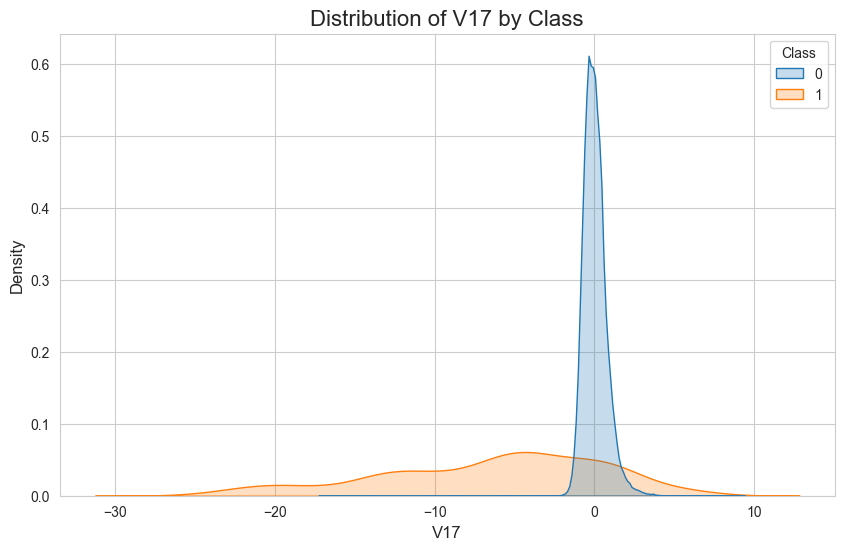


EDA for creditcard.csv is complete.


In [3]:
# --- 2. Exploratory Data Analysis (EDA) ---

# A. Analyze Class Imbalance
print("\n--- Credit Card Class Distribution ---")
class_dist_credit = credit_df['Class'].value_counts(normalize=True) * 100
print(class_dist_credit)

plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=credit_df)
plt.title('Credit Card Class Distribution', fontsize=16)
plt.xlabel('Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Save the figure
filename = 'creditcard_class_distribution.png'
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
print(f"Saved plot: {filename}")
plt.show()


# B. Analyze the 'Amount' Feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Transaction Amount Distribution by Class', fontsize=16)
plt.xlabel('Class (0: Legitimate, 1: Fraud)', fontsize=12)
plt.ylabel('Transaction Amount ($)', fontsize=12)
plt.ylim(0, 300) # Zoom in to see the difference for most transactions

# Save the figure
filename = 'creditcard_amount_by_class.png'
plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
print(f"Saved plot: {filename}")
plt.show()


# C. Analyze the Anonymized 'V' Features
# We can't interpret them directly, but we can see if their distributions
# differ between fraud and non-fraud cases.
# Let's visualize a few interesting ones.
v_features_to_plot = ['V10', 'V12', 'V14', 'V17']

print("\n--- Visualizing Distributions of Key 'V' Features ---")
for feature in v_features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=credit_df, x=feature, hue='Class', fill=True, common_norm=False)
    plt.title(f'Distribution of {feature} by Class', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Save the figure
    filename = f'creditcard_{feature}_distribution.png'
    plt.savefig(os.path.join(output_dir, filename), dpi=300, bbox_inches='tight')
    print(f"Saved plot: {filename}")
    plt.show()

print("\nEDA for creditcard.csv is complete.")